# GEOGRAPHICAL VISUALIZATION 

## 1. IMPORTING LIBRARIES AND DATA

## 2. GEOGRAPHICAL ANALYSIS

## 3. DATA WRANGLING AND CLEANING

## 4. PLOTTING A CHOROPLETH

1. ### IMPORTING LIBRARIES, DATASET AND JSON

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium 
import json

In [4]:
%matplotlib inline

### DEFINING THE PATH 

In [10]:
path = r'C:\Users\gryzu\Supply Chain Management'

In [6]:
path

'C:\\Users\\gryzu\\Supply Chain Management'

### IMPORTING DATASET

In [7]:
path_to_pickle = os.path.join(path, '1 DATA', 'FORMATTED', 'ASIASCM_CLEANED.pkl')

In [8]:
asia = pd.read_pickle(path_to_pickle)

In [9]:
asia.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late Delivery Risk,Category Id,Category Name,Department Id,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Name,Product Price,Shipping Date,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,2,...,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,2,...,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,2,...,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class
3,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,2,...,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,73,Smart watch,327.75,2018-01-15 10:42:00,First Class
4,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,2,...,285.140015,68.430000,Eastern Asia,Guangdong,PROCESSING,73,Smart watch,327.75,2018-01-15 10:21:00,First Class


In [15]:
asia.shape

(31112, 29)

### IMPORT JSON FILE

In [11]:
# Import ".json" file for the Asia 

country_geo = r'C:\Users\gryzu\Supply Chain Management\1 DATA\JSON\custom.geo.json'

In [14]:
with open(r'C:\Users\gryzu\Supply Chain Management\1 DATA\JSON\custom.geo.json', encoding='utf-8') as f:
    data = json.load(f)

for feature in data['features']:
    print(feature)

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 2, 'sovereignt': 'Indonesia', 'sov_a3': 'IDN', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Indonesia', 'adm0_a3': 'IDN', 'geou_dif': 0, 'geounit': 'Indonesia', 'gu_a3': 'IDN', 'su_dif': 0, 'subunit': 'Indonesia', 'su_a3': 'IDN', 'brk_diff': 0, 'name': 'Indonesia', 'name_long': 'Indonesia', 'brk_a3': 'IDN', 'brk_name': 'Indonesia', 'brk_group': None, 'abbrev': 'Indo.', 'postal': 'INDO', 'formal_en': 'Republic of Indonesia', 'formal_fr': None, 'name_ciawf': 'Indonesia', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Indonesia', 'name_alt': None, 'mapcolor7': 6, 'mapcolor8': 6, 'mapcolor9': 6, 'mapcolor13': 11, 'pop_est': 270625568, 'pop_rank': 17, 'pop_year': 2019, 'gdp_md': 1119190, 'gdp_year': 2019, 'economy': '4. Emerging region: MIKT', 'income_grp': '4. Lower middle income', 'fips_10': 'ID', 'iso_a2': 'ID', 'iso_a2_eh': 'ID', 'iso_a3': 'IDN', 'iso_a3_

### 2. DATA WRANGLING AND CLEANING

In [17]:
asia.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late Delivery Risk', 'Category Id', 'Category Name', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Date', 'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Category Id', 'Product Name', 'Product Price', 'Shipping Date',
       'Shipping Mode'],
      dtype='object')

In [20]:
# representing all unique names in the column ''Order Country''
unique_order_country = asia['Order Country'].unique()

print(unique_order_country)

['Indonesia' 'India' 'China' 'Japón' 'Corea del Sur' 'Singapur' 'Turquía'
 'Mongolia' 'Israel' 'Bangladés' 'Tailandia' 'Irak' 'Arabia Saudí'
 'Filipinas' 'Kazajistán' 'Irán' 'Myanmar (Birmania)' 'Uzbekistán'
 'Afganistán' 'Pakistán' 'Vietnam' 'Malasia' 'Yemen' 'Kirguistán'
 'Georgia' 'Nepal' 'Emiratos Árabes Unidos' 'Camboya' 'Laos' 'Baréin'
 'Sri Lanka' 'Tayikistán' 'Siria' 'Azerbaiyán' 'Turkmenistán' 'Jordania'
 'Hong Kong' 'Qatar' 'Omán' 'Taiwán' 'Líbano' 'Armenia' 'Kuwait' 'Bután']


Since in the dataset all country values are located under "Order Country" column (without zeros and dummies), we do not need to apply additional steps, since cleaning process has been done in 6.1. All the country names have also the same format as in JSON.

### CHECKING SALES VARIABLE

One of my research questions was: "Which region and market makes the highest sales? Lowest sales?" Thus, I want to compare the sales around the countries, thefore I need to check the Sales variable for extreme values

C:\Users\gryzu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales', ylabel='Count'>

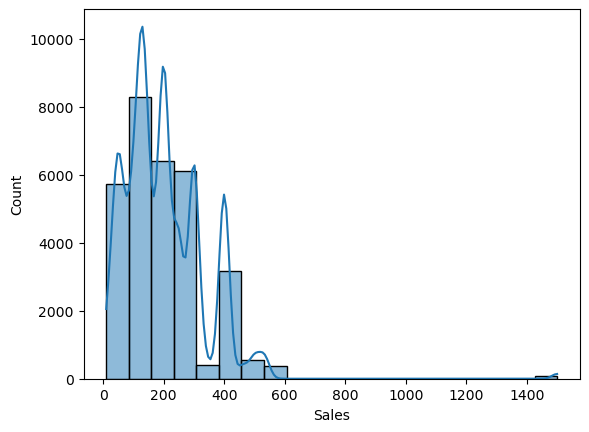

In [22]:
sns.histplot(asia['Sales'], bins=20, kde = True)

As we can see, all sales look normal, without any extreme values.

### 4. PLOTTING A CHOROPLETH

In [31]:
# Creating a data frame with just countries and sales

data_to_plot = asia[['Order Country', 'Sales']]

# Aggregate sales by country (summing up the sales for each country)
country_sales = data_to_plot.groupby('Order Country', as_index=False)['Sales'].sum()

# Displaying first 50 rows
print(country_sales.head(50))

             Order Country         Sales
0               Afganistán  3.856886e+04
1             Arabia Saudí  1.631497e+05
2                  Armenia  4.559000e+02
3               Azerbaiyán  1.336954e+04
4                Bangladés  9.468618e+04
5                   Baréin  5.298900e+02
6                    Bután  7.696000e+02
7                  Camboya  2.782649e+04
8                    China  1.172902e+06
9            Corea del Sur  1.232350e+05
10  Emiratos Árabes Unidos  5.690390e+03
11               Filipinas  4.202698e+05
12                 Georgia  1.849805e+04
13               Hong Kong  1.403402e+04
14                   India  9.623967e+05
15               Indonesia  8.476059e+05
16                    Irak  1.931682e+05
17                    Irán  2.858692e+05
18                  Israel  5.402376e+04
19                   Japón  1.543521e+05
20                Jordania  2.000661e+04
21              Kazajistán  5.374219e+04
22              Kirguistán  1.899120e+04
23              

In [35]:
# JSON data reading
with open(country_geo, 'r', encoding='utf-8') as f:
    geo_data = json.load(f)

# Createing a folium map
map = folium.Map(location=[30, 0], zoom_start=2)

# Add a choropleth layer to the map using country_sales DataFrame
folium.Choropleth(
    geo_data=geo_data,
    data=country_sales,
    columns=['Order Country', 'Sales'],
    key_on='feature.properties.name',  
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name='Total Sales'
).add_to(map)

# Add a layer 
folium.LayerControl().add_to(map)

# Display the map
map

In [34]:
# Saving the map
map.save('plot_data.html')

Looking at map, we can answer one of the research questions: - "Which countries and market make the highest sales number? Lowest sales number?" 
We can see that the countries of Near East(Turkey, Syria), Central Asia (Kazakhstan, Uzbekistan, Turkmenistan), Eastern Asia (Japan, Malaysia, Mongolia) do the lowest sales. Whereas such countries as China, India and Indonesia makes the largest sales. 